# Optics Algorithm Implementation

importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


Creating a data set

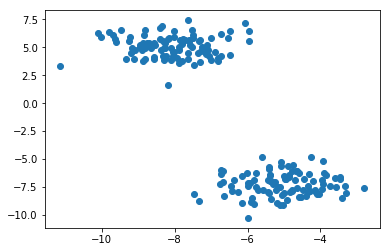

In [2]:
X,y = make_blobs(n_samples=200,n_features=2,centers=2,random_state=19) 
# X is the data and y are cluster labels
plt.scatter(X[:,0],X[:,1])

Parameters defined

In [3]:
eps=10
minpt=3

Distance function

In [4]:
def dist(p1,q1):
    sum_sq=0
    for i in range(len(p1)):
        sum_sq+=(p1[i]-q1[i])**2
    return(sum_sq**(1/2))

Creating Neighbourhood function

In [5]:
def get_nbd(p):  #to find the neighbourhood of agiven point p
    l=[]
    for j in X:
        if dist(p,j)<eps and dist(p,j)>0:
            l.append(list(j))
    return(l)


To find the distance of the nth point

In [6]:
def minptth_dist(p):
    l=[]
    for i in range(len(X)):
        l.append(dist(p,X[i]))
    l.sort()
    return l[minpt-1]


Defining Core distance and Reachability distance

In [7]:
def core_dist(p):
    if len(get_nbd(p))<minpt:
        c_d=np.inf
    else:
        c_d=minptth_dist(p)
    return(c_d)

In [8]:
def reach_dist(o,p):
    if len(get_nbd(p))<minpt:
        r_d=np.inf
    else:
        r_d=max(core_dist(p),dist(p,o))
    return(r_d)


Defining function to find the position of a point in the neighbourhood of a point

In [9]:
def find_ind(neig):
    l=[]
    for i in neig:
        for j in range(len(X)):
            if list(i)==list(list(X[j])):
                l.append(j)
    return(l)
#find_ind(get_nbd(X[0]))

Creating dataframe to update values

In [10]:
col=['points','cluster','reach_dist','core_dist']
idx=range(len(X))
df=pd.DataFrame(columns=col,index=idx)
df.iloc[:,0]=list(X)
df.iloc[:,1]=0
df.iloc[:,2]=1000
df.iloc[:,3]=1000
df.head()

,points,cluster,reach_dist,core_dist
0,"[-5.399745969389058, -5.871338392685264]",0,1000,1000
1,"[-7.095478470987599, 4.796724730927463]",0,1000,1000
2,"[-5.906015740696437, -8.818806262645342]",0,1000,1000
3,"[-7.462995210456429, 3.3855207777016796]",0,1000,1000
4,"[-8.019434148418728, 4.577537113395674]",0,1000,1000


To perform step one of the optics algorithm

In [11]:
def step_one(p,p_i,ind,nbd):
    df.iloc[p_i,3]=core_dist(X[p_i])
    for j in range(len(nbd)):
        df.iloc[ind[j],2]=min(df.iloc[ind[j],2], max(core_dist(X[p_i]),dist(X[ind[j]],X[p_i])))

Running the algorithm

In [12]:
processed=[]       #To store processed points
clstr=0
for i in range(df.shape[0]):
    if list(X[i]) not in processed:
        p=list(X[i])
        nbd=get_nbd(p)       #Getting neighbourhood of X[i]
        processed.append(p)  #Updating processed points list
        if len(nbd)>minpt:
            clstr=clstr+1
            df.iloc[i,1]=clstr         #Assigning clusters
            ind=find_ind(nbd)          #To get the indices of the cneighbouring points of X[i]
            step_one(p,i,ind,nbd)      #Performing step one
            for j in range(len(nbd)):
                df.iloc[ind[j],1]=clstr         #Assigning cluster to the neighbours
                if list(X[ind[j]]) not in processed:
                    p1=X[ind[j]]
                    nbd1=get_nbd(list(X[ind[j]]))       #Getting the neighbourhood of the neighbours
                    processed.append(list(X[ind[j]]))   #updating processed points list
                    if len(nbd1)>=minpt:
                        ind1=find_ind(nbd1)             #Finding the indices
                        step_one(p1,ind[j],ind1,nbd1)   #Performing step two i.e. step one one the neighbours of X[i]
            

In [13]:
df.head()

,points,cluster,reach_dist,core_dist
0,"[-5.399745969389058, -5.871338392685264]",1,0.333270,0.387376
1,"[-7.095478470987599, 4.796724730927463]",2,0.220120,0.210040
2,"[-5.906015740696437, -8.818806262645342]",1,0.342093,0.296516
3,"[-7.462995210456429, 3.3855207777016796]",2,0.353622,0.452634
4,"[-8.019434148418728, 4.577537113395674]",2,0.276270,0.276270


Final plot

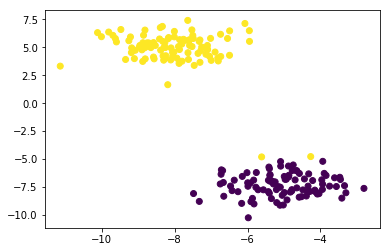

In [14]:
plt.scatter(X[:,0],X[:,1],c=df['cluster'])